In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definig the file path
file_path = "/content/drive/MyDrive/laptop_prices.csv"

In [ ]:
#reading csv file
df = pd.read_csv(file_path, encoding='latin1')
print(df)

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

      Ram          OS  Weig

In [ ]:
df = df.drop(columns=['Touchscreen']) # Removing irrelevant or redundant column

In [ ]:
df.isnull().sum() # finding missing values

,0
Company,0
Product,0
TypeName,12
Inches,12
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
#Handling Missing Values
df['TypeName'] = df['TypeName'].fillna(df['TypeName'].mode()[0])
df['Inches'] = df['Inches'].fillna(df['Inches'].median())
df['CPU_model'] =df['CPU_model'].fillna(df['CPU_model'].mode()[0])


In [ ]:
#Checking if there is any remaining missing value
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
print(df)

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

      Ram          OS  Weig

### **a. The top 5 laptop brands by number of products listed**


print(df['Company'].value_counts().head(5))
print("Top 5 laptop brands:")




In [ ]:
top_brands = df['Company'].value_counts().head(5)
print('Top 5 Laptop Brands')
print(top_brands)

Top 5 Laptop Brands
Company
Dell      291
Lenovo    289
HP        268
Asus      152
Acer      101
Name: count, dtype: int64


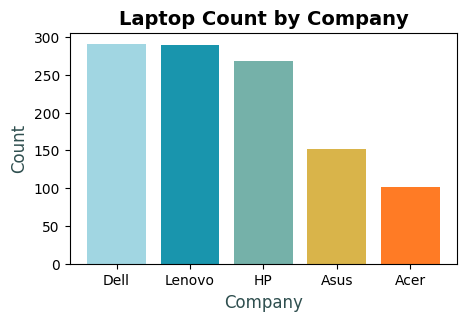

In [ ]:
#Demonstrating the top companies in Bar Diagram
companies = ['Dell', 'Lenovo', 'HP', 'Asus', 'Acer']
counts = [291, 289, 268, 152, 101]
colors = ['#A1D6E2', '#1995AD', '#75B1A9', '#D9B44A', '#FF7B25']

plt.figure(figsize=(5, 3))
plt.bar(companies, counts, color=colors)
plt.title('Laptop Count by Company', fontsize=14, fontweight='bold', color= 'BLACK')
plt.xlabel('Company', fontsize=12, color='#2F4F4F')
plt.ylabel('Count', fontsize=12, color='#2F4F4F')
plt.show()

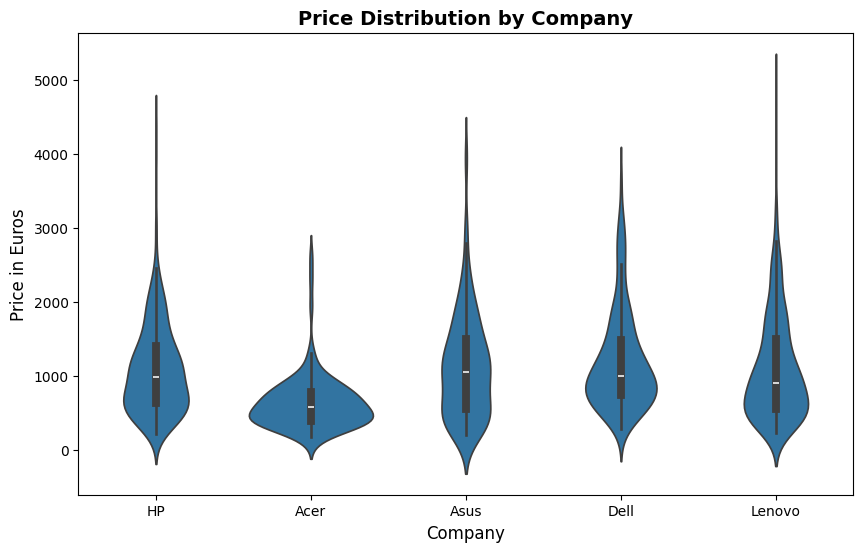

In [ ]:
top_5_companies = ['Dell', 'Lenovo', 'HP', 'Asus', 'Acer']
df_top5 = df[df['Company'].isin(top_5_companies)]
plt.figure(figsize=(10, 6))
sns.violinplot(x='Company', y='Price_euros', data=df_top5)
plt.title('Price Distribution by Company', fontsize= 14, fontweight ='bold', color = "black")

plt.xlabel('Company', fontsize= 12, color = "black" )
plt.ylabel('Price in Euros', fontsize= 12, color = "black")
plt.show()

## **b. The average price of laptops for each brand and identification of the brand which has the highest and lowest average price**

In [ ]:
avg_price_of_laptops_for_each_brand = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
print("Average Price of Laptops Each Brand:\n", avg_price_of_laptops_for_each_brand)

print(f"Highest Average Price Brand: {avg_price_of_laptops_for_each_brand.idxmax()} : {avg_price_of_laptops_for_each_brand.max()} Euros")
print(f"Lowest Average Price Brand: {avg_price_of_laptops_for_each_brand.idxmin()} : {avg_price_of_laptops_for_each_brand.min()} Euros")

Average Price of Laptops Each Brand:
 Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64
Highest Average Price Brand: Razer : 3346.1428571428573 Euros
Lowest Average Price Brand: Vero : 217.425 Euros


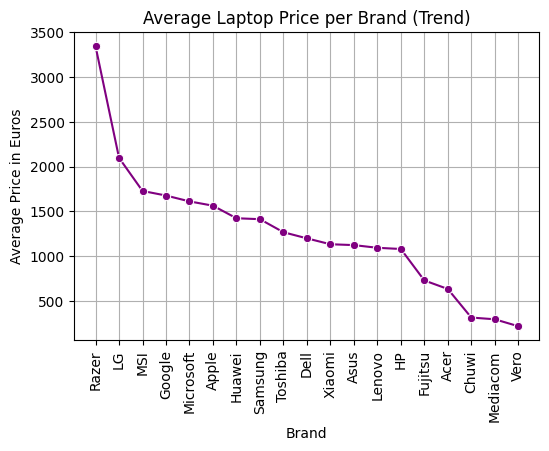

In [ ]:
plt.figure(figsize=(6, 4))
df_avg_price = avg_price_of_laptops_for_each_brand.reset_index()
df_avg_price.columns = ['Brand', 'Average Price']
sns.lineplot(x='Brand', y='Average Price', data=df_avg_price, marker='o', color='purple')
plt.title('Average Laptop Price per Brand (Trend)')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Average Price in Euros')
plt.grid(True)
plt.show()

## **c. The correlation between Price_euros and other numeric features such as CPU_freq, Ram, Inches, and Weight and IDENTIFICATION of the features which  are most correlated with price**


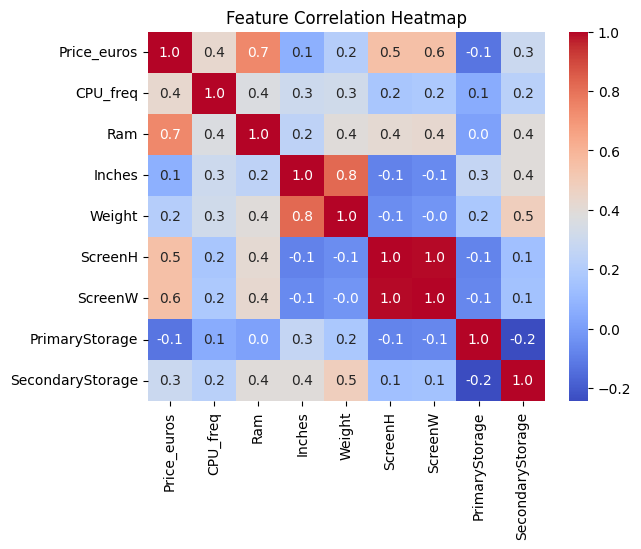

Price_euros         1.000000
Ram                 0.740287
ScreenW             0.552491
ScreenH             0.548529
CPU_freq            0.428847
SecondaryStorage    0.291207
Weight              0.211883
Inches              0.070394
PrimaryStorage     -0.124775
Name: Price_euros, dtype: float64


In [ ]:
Numeric_Features = ['Price_euros', 'CPU_freq', 'Ram','Inches','Weight', 'ScreenH', 'ScreenW', 'PrimaryStorage', 'SecondaryStorage']
correlation_matrix = df[Numeric_Features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Feature Correlation Heatmap")
plt.show()

Correlation_with_Price = correlation_matrix['Price_euros'].sort_values(ascending=False)
print(Correlation_with_Price)

## **d. Creating a new feature, StorageTotal, by summing PrimaryStorage and SecondaryStorage**

In [ ]:
df['StorageTotal'] = df['PrimaryStorage'] + df['SecondaryStorage']
print(df[['PrimaryStorage', 'SecondaryStorage', 'StorageTotal']])

      PrimaryStorage  SecondaryStorage  StorageTotal
0                128                 0           128
1                128                 0           128
2                256                 0           256
3                512                 0           512
4                256                 0           256
...              ...               ...           ...
1270             128                 0           128
1271             512                 0           512
1272              64                 0            64
1273            1024                 0          1024
1274             500                 0           500

[1275 rows x 3 columns]


###**e. A regression model using features like Ram, Inches, CPU_freq, PrimaryStorage, and GPU_company to predict the Price_euros of a laptop. Suggestion for the best regression model**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
#List of categorical columns to encode
columns_to_encode = ['GPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'Screen', 'CPU_model', 'GPU_company']

label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
X_reg = df[['Ram', 'Inches', 'CPU_freq', 'PrimaryStorage', 'GPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'Screen', 'CPU_model', 'GPU_company']]
y_reg = df['Price_euros']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:

X = df[['Ram', 'Inches', 'CPU_freq', 'PrimaryStorage', 'GPU_model',
        'PrimaryStorageType', 'SecondaryStorageType', 'Screen',
        'CPU_model', 'GPU_company']]
Y = df['Price_euros']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

rmse_values = {}

for model_name, model in models.items():

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    rmse_values[model_name] = rmse
    print(f'{model_name} RMSE: {rmse}')
best_model = min(rmse_values, key=rmse_values.get)
print(f'\nBest Model: {best_model} with RMSE: {rmse_values[best_model]}')

Linear Regression RMSE: 395.8769597487564
Random Forest RMSE: 247.0809639720093
Gradient Boosting RMSE: 257.67326519612953
Ridge Regression RMSE: 395.88273677259525
Lasso Regression RMSE: 395.86798306342615

Best Model: Random Forest with RMSE: 247.0809639720093


###**f. Creation of a classification model to predict the laptop type (TypeName) based on features such as Inches, Ram, PrimaryStorage, and Weight. Identification of the features which are the most important in my  classification model. Suggestion for the best classification model**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['Ram', 'Inches',  'PrimaryStorage', 'GPU_model',
        'PrimaryStorageType', 'Weight', 'SecondaryStorageType',
        ]]

y = df['TypeName']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear')
}

accuracy_scores = {}

for clf_name, clf in classifiers.items():

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[clf_name] = accuracy
    print(f'{clf_name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred), '\n')

best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f'Best Classification Model: {best_model} with Accuracy: {accuracy_scores[best_model]}')

if best_model == 'Random Forest' or best_model == 'Gradient Boosting':
    importances = classifiers[best_model].feature_importances_
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    print('\nFeature Importance for Best Model:')
    print(feature_importance)

Logistic Regression Accuracy: 0.7529411764705882
                    precision    recall  f1-score   support

2 in 1 Convertible       0.50      0.11      0.18        28
            Gaming       0.80      0.81      0.80        43
           Netbook       0.75      0.75      0.75         4
          Notebook       0.80      0.90      0.85       141
         Ultrabook       0.56      0.70      0.62        33
       Workstation       1.00      0.17      0.29         6

          accuracy                           0.75       255
         macro avg       0.73      0.57      0.58       255
      weighted avg       0.74      0.75      0.72       255

[[  3   3   1  12   9   0]
 [  0  35   0   8   0   0]
 [  0   0   3   0   1   0]
 [  0   6   0 127   8   0]
 [  3   0   0   7  23   0]
 [  0   0   0   5   0   1]] 

Random Forest Accuracy: 0.796078431372549
                    precision    recall  f1-score   support

2 in 1 Convertible       0.57      0.29      0.38        28
            Gaming  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X = df[['Ram', 'Inches',  'PrimaryStorage', 'GPU_model',
        'PrimaryStorageType', 'Weight',
        ]]
y = df['TypeName']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear')
}
accuracy_scores = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[clf_name] = accuracy
    print(f'{clf_name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred), '\n')

best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f'Best Classification Model: {best_model} with Accuracy: {accuracy_scores[best_model]}')

if best_model == 'Random Forest' or best_model == 'Gradient Boosting':
    importances = classifiers[best_model].feature_importances_
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    print('\nFeature Importance for Best Model:')
    print(feature_importance)


Logistic Regression Accuracy: 0.7333333333333333
                    precision    recall  f1-score   support

2 in 1 Convertible       0.50      0.11      0.18        28
            Gaming       0.71      0.74      0.73        43
           Netbook       0.75      0.75      0.75         4
          Notebook       0.79      0.89      0.84       141
         Ultrabook       0.57      0.70      0.63        33
       Workstation       0.00      0.00      0.00         6

          accuracy                           0.73       255
         macro avg       0.55      0.53      0.52       255
      weighted avg       0.70      0.73      0.70       255

[[  3   4   1  11   9   0]
 [  0  32   0  11   0   0]
 [  0   0   3   0   1   0]
 [  0   8   0 126   7   0]
 [  3   0   0   7  23   0]
 [  0   1   0   5   0   0]] 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.792156862745098
                    precision    recall  f1-score   support

2 in 1 Convertible       0.53      0.29      0.37        28
            Gaming       0.84      0.98      0.90        43
           Netbook       0.50      0.50      0.50         4
          Notebook       0.86      0.88      0.87       141
         Ultrabook       0.60      0.73      0.66        33
       Workstation       1.00      0.33      0.50         6

          accuracy                           0.79       255
         macro avg       0.72      0.62      0.63       255
      weighted avg       0.79      0.79      0.78       255

[[  8   1   1  10   8   0]
 [  0  42   0   1   0   0]
 [  1   0   2   0   1   0]
 [  4   6   0 124   7   0]
 [  2   1   1   5  24   0]
 [  0   0   0   4   0   2]] 

Gradient Boosting Accuracy: 0.8156862745098039
                    precision    recall  f1-score   support

2 in 1 Convertible       0.80      0.29      0.42        28
            Gaming    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
best_random_state = None
best_accuracy = 0

for state in [42, 24, 100, 123]:
    print(f"\nRandom State: {state}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    accuracy_scores = {}
    for clf_name, clf in classifiers.items():

        clf.fit(X_train_scaled, y_train)

        y_pred = clf.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[clf_name] = accuracy

        print(f'{clf_name} Accuracy: {accuracy}')
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred), '\n')


    best_model = max(accuracy_scores, key=accuracy_scores.get)
    print(f'Best Classification Model for random_state {state}: {best_model} with Accuracy: {accuracy_scores[best_model]}')


    if accuracy_scores[best_model] > best_accuracy:
        best_accuracy = accuracy_scores[best_model]
        best_random_state = state

print(f'\nBest random_state: {best_random_state} with Accuracy: {best_accuracy}')


Random State: 42
Logistic Regression Accuracy: 0.7333333333333333
                    precision    recall  f1-score   support

2 in 1 Convertible       0.50      0.11      0.18        28
            Gaming       0.71      0.74      0.73        43
           Netbook       0.75      0.75      0.75         4
          Notebook       0.79      0.89      0.84       141
         Ultrabook       0.57      0.70      0.63        33
       Workstation       0.00      0.00      0.00         6

          accuracy                           0.73       255
         macro avg       0.55      0.53      0.52       255
      weighted avg       0.70      0.73      0.70       255

[[  3   4   1  11   9   0]
 [  0  32   0  11   0   0]
 [  0   0   3   0   1   0]
 [  0   8   0 126   7   0]
 [  3   0   0   7  23   0]
 [  0   1   0   5   0   0]] 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.792156862745098
                    precision    recall  f1-score   support

2 in 1 Convertible       0.53      0.29      0.37        28
            Gaming       0.84      0.98      0.90        43
           Netbook       0.50      0.50      0.50         4
          Notebook       0.86      0.88      0.87       141
         Ultrabook       0.60      0.73      0.66        33
       Workstation       1.00      0.33      0.50         6

          accuracy                           0.79       255
         macro avg       0.72      0.62      0.63       255
      weighted avg       0.79      0.79      0.78       255

[[  8   1   1  10   8   0]
 [  0  42   0   1   0   0]
 [  1   0   2   0   1   0]
 [  4   6   0 124   7   0]
 [  2   1   1   5  24   0]
 [  0   0   0   4   0   2]] 

Gradient Boosting Accuracy: 0.8156862745098039
                    precision    recall  f1-score   support

2 in 1 Convertible       0.80      0.29      0.42        28
            Gaming    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Accuracy: 0.8196078431372549
                    precision    recall  f1-score   support

2 in 1 Convertible       0.82      0.48      0.61        29
            Gaming       0.94      0.87      0.91        39
           Netbook       0.67      0.40      0.50         5
          Notebook       0.81      0.96      0.88       136
         Ultrabook       0.75      0.73      0.74        37
       Workstation       0.50      0.11      0.18         9

          accuracy                           0.82       255
         macro avg       0.75      0.59      0.64       255
      weighted avg       0.81      0.82      0.80       255

[[ 14   0   0   8   7   0]
 [  0  34   0   5   0   0]
 [  0   0   2   1   2   0]
 [  2   2   0 131   0   1]
 [  1   0   1   8  27   0]
 [  0   0   0   8   0   1]] 

Gradient Boosting Accuracy: 0.8627450980392157
                    precision    recall  f1-score   support

2 in 1 Convertible       0.79      0.52      0.62        29
            Gaming   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.7686274509803922
                    precision    recall  f1-score   support

2 in 1 Convertible       0.50      0.04      0.08        23
            Gaming       0.84      0.74      0.79        43
           Netbook       0.75      0.60      0.67         5
          Notebook       0.80      0.94      0.87       139
         Ultrabook       0.60      0.76      0.67        38
       Workstation       0.00      0.00      0.00         7

          accuracy                           0.77       255
         macro avg       0.58      0.52      0.51       255
      weighted avg       0.73      0.77      0.73       255

[[  1   3   1   6  12   0]
 [  1  32   0  10   0   0]
 [  0   0   3   0   2   0]
 [  0   3   0 131   5   0]
 [  0   0   0   9  29   0]
 [  0   0   0   7   0   0]] 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.803921568627451
                    precision    recall  f1-score   support

2 in 1 Convertible       0.64      0.39      0.49        23
            Gaming       0.93      0.88      0.90        43
           Netbook       0.25      0.20      0.22         5
          Notebook       0.81      0.94      0.87       139
         Ultrabook       0.71      0.58      0.64        38
       Workstation       1.00      0.57      0.73         7

          accuracy                           0.80       255
         macro avg       0.72      0.59      0.64       255
      weighted avg       0.80      0.80      0.79       255

[[  9   0   0  11   3   0]
 [  0  38   0   5   0   0]
 [  2   0   1   0   2   0]
 [  1   3   0 131   4   0]
 [  2   0   3  11  22   0]
 [  0   0   0   3   0   4]] 

Gradient Boosting Accuracy: 0.8509803921568627
                    precision    recall  f1-score   support

2 in 1 Convertible       0.82      0.39      0.53        23
            Gaming    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.792156862745098
                    precision    recall  f1-score   support

2 in 1 Convertible       0.50      0.36      0.42        22
            Gaming       0.86      0.89      0.87        35
           Netbook       0.00      0.00      0.00         1
          Notebook       0.86      0.87      0.86       146
         Ultrabook       0.69      0.72      0.70        46
       Workstation       1.00      0.60      0.75         5

          accuracy                           0.79       255
         macro avg       0.65      0.57      0.60       255
      weighted avg       0.80      0.79      0.79       255

[[  8   0   1   7   6   0]
 [  1  31   0   3   0   0]
 [  0   0   0   0   1   0]
 [  4   5   2 127   8   0]
 [  3   0   1   9  33   0]
 [  0   0   0   2   0   3]] 

Gradient Boosting Accuracy: 0.803921568627451
                    precision    recall  f1-score   support

2 in 1 Convertible       0.41      0.41      0.41        22
            Gaming     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
